# Clone and Install YOLOv5

In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
%cd yolov5

!pip install -r requirements.txt

/home/sagemaker-user/yolov5
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl.metadata (2.7 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.3 MB/s eta 0:00:00
Using cached ultralytics_thop-2.0.14-py3-none-any.whl (26 kB)
Using cached py_cpuinfo-9.0.0-py3-none-any.whl (22 kB)


In [6]:
import os
print(os.getcwd())

/home/sagemaker-user/yolov5


# Recreated the YOLOv5 architecture with a specific number of classes
This code was inspired from the lab code, and it basically hardcodes the original YOLOv5s model architecture.

In [3]:

number_of_classes = 5 
with open('new_train.yaml', 'w+') as file:
    file.write(
        f"""
        # parameters
        nc: {number_of_classes}  # number of classes
        depth_multiple: 0.33  # model depth multiple
        width_multiple: 0.50  # layer channel multiple

        # anchors
        anchors:
          - [10,13, 16,30, 33,23]  # P3/8
          - [30,61, 62,45, 59,119]  # P4/16
          - [116,90, 156,198, 373,326]  # P5/32

        # YOLOv5 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Focus, [64, 3]],  # 0-P1/2
           [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
           [-1, 3, BottleneckCSP, [128]],
           [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
           [-1, 9, BottleneckCSP, [256]],
           [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
           [-1, 9, BottleneckCSP, [512]],
           [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
           [-1, 1, SPP, [1024, [5, 9, 13]]],
           [-1, 3, BottleneckCSP, [1024, False]],  # 9
          ]

        # YOLOv5 head
        head:
          [[-1, 1, Conv, [512, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 6], 1, Concat, [1]],  # cat backbone P4
           [-1, 3, BottleneckCSP, [512, False]],  # 13

           [-1, 1, Conv, [256, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 4], 1, Concat, [1]],  # cat backbone P3
           [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

           [-1, 1, Conv, [256, 3, 2]],
           [[-1, 14], 1, Concat, [1]],  # cat head P4
           [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

           [-1, 1, Conv, [512, 3, 2]],
           [[-1, 10], 1, Concat, [1]],  # cat head P5
           [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

           [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
          ]
        """
    )

# These updates and installations were done to solve an error.

In [1]:
!sudo apt-get update
!sudo apt-get install -y libgl1-mesa-glx



Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease                         
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]      
Get:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]      
Get:6 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1245 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4436 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1665 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [47.7 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [4282 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3211 kB]
Get:12 http://archive.ubuntu.com/ubuntu j

In [5]:
%cd /home/sagemaker-user
!pwd

/home/sagemaker-user
/home/sagemaker-user


In [7]:
!ls

CITATION.cff	 benchmarks.py	hubconf.py	  segment
CONTRIBUTING.md  classify	models		  train.py
LICENSE		 data		new_train.yaml	  tutorial.ipynb
README.md	 data.yaml	pyproject.toml	  utils
README.zh-CN.md  detect.py	requirements.txt  val.py
__pycache__	 export.py	runs


In [14]:
%cd ..


/home/sagemaker-user


In [15]:
!pwd

/home/sagemaker-user


# First Training Instance
### All the images were resized to 640X640 dimensions,epochs were set as 300
### The batch size was kept as 16
### EarlyStopping was implemented with patience being set as 25
### The weights were kept null as ' ', the model was trained from scratch

## A problem I faced:
#### This code was producing very detailed output log, and as my model was training, the tab crashed with lack of memory, however, as YOLO automatically checkpoints I had the best and last weights saved in my exp5 folder in runs in yolov5.
#### I reran this code again before I realized that I can resume training.
## How I solved it
#### I fixed the warning error in train.py in yolov5 directory, I commented out the pbar.set_description function, also commented out the code that caused logs over iteration and progress bar

In [ ]:
!python yolov5/train.py --img 640 --batch 16 --epochs 300 --data yolov5/data.yaml --cfg yolov5/new_train.yaml --patience 25 --weights ''


2025-05-10 07:02:16.649768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746860536.668807    3884 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746860536.674444    3884 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=, cfg=yolov5/new_train.yaml, data=yolov5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, pro

In [4]:
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 216.9 MB/s eta 0:00:0000:01


In [7]:
!pwd

/home/sagemaker-user


# Resume Training from the last checkpoint
## The last checkpoint is defined in the --weights parameter

In [10]:
!python yolov5/train.py --img 640 --batch 16 --epochs 200 --data yolov5/data.yaml --cfg yolov5/new_train.yaml --patience 20 --weights yolov5/runs/train/exp5/weights/last.pt 

2025-05-10 09:40:48.275787: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746870048.293797    3616 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746870048.299618    3616 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5/runs/train/exp5/weights/last.pt, cfg=yolov5/new_train.yaml, data=yolov5/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=yolov5/data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimi

# Evaluation of the best model from exp11 on the test dataset

In [11]:
!python yolov5/val.py --weights yolov5/runs/train/exp11/weights/best.pt --data yolov5/data.yaml --task test



val: data=yolov5/data.yaml, weights=['yolov5/runs/train/exp11/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)

Fusing layers... 
new_train summary: 182 layers, 7257306 parameters, 0 gradients
test: Scanning /home/sagemaker-user/dataset/Object_Detection/yolo/test/labels...
test: New cache created: /home/sagemaker-user/dataset/Object_Detection/yolo/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all        226       2948      0.919       0.91      0.953      0.689
                 Ready        226        289      0.793      0.863      0.857      0.528
             empty_pod      

In [4]:
!pwd
!cd ../
!pwd

/home/sagemaker-user
/home/sagemaker-user


In [5]:
!python yolov5/detect.py --weights yolov5/runs/train/exp11/weights/best.pt --source 'dataset/Object_Detection/yolo/test/images/100011.jpg'  --img 640 --conf 0.5 --save-txt

detect: weights=['yolov5/runs/train/exp11/weights/best.pt'], source=dataset/Object_Detection/yolo/test/images/100011.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)

Fusing layers... 
new_train summary: 182 layers, 7257306 parameters, 0 gradients
image 1/1 /home/sagemaker-user/dataset/Object_Detection/yolo/test/images/100011.jpg: 384x640 5 germinations, 7 youngs, 32.7ms
Speed: 1.4ms pre-process, 32.7ms inference, 254.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp4
1 labels saved to

In [2]:
!pwd

/home/sagemaker-user


# Running our best model over the entire test images folder to produce detections

In [16]:
!python yolov5/detect.py \
  --weights yolov5/runs/train/exp11/weights/best.pt \
  --source dataset/Object_Detection/yolo/test/images \
  --img 640 \
  --conf 0.5 \
  --save-txt \
  --save-conf \
  --name test_preds


detect: weights=['yolov5/runs/train/exp11/weights/best.pt'], source=dataset/Object_Detection/yolo/test/images, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=test_preds, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-416-gfe1d4d99 Python-3.12.9 torch-2.5.1 CUDA:0 (Tesla T4, 14918MiB)

Fusing layers... 
new_train summary: 182 layers, 7257306 parameters, 0 gradients
image 1/226 /home/sagemaker-user/dataset/Object_Detection/yolo/test/images/100006.jpg: 384x640 4 empty_pods, 16 youngs, 33.7ms
image 2/226 /home/sagemaker-user/dataset/Object_Detection/yolo/test/images/100011.jpg: 384x640 5 germinations, 7 youngs, 8.1ms
image 3/226 /home/sagemaker

# Visualising Predictions produced by the model and comparing them with the ground truth
This code was made with Gen ai,specifically chatgpt

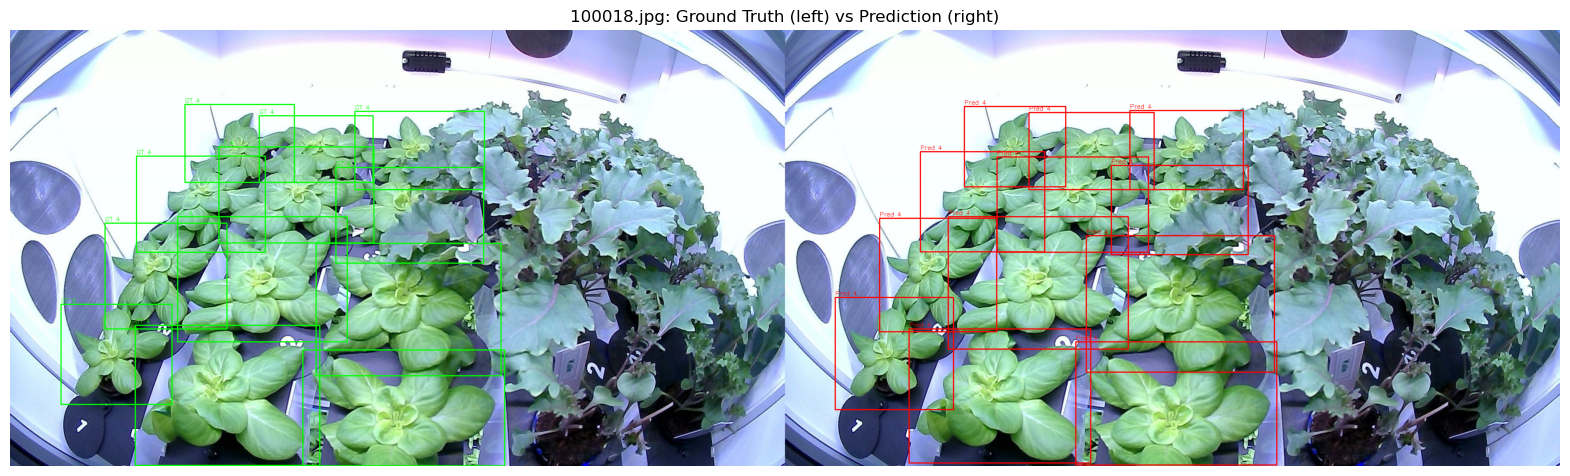

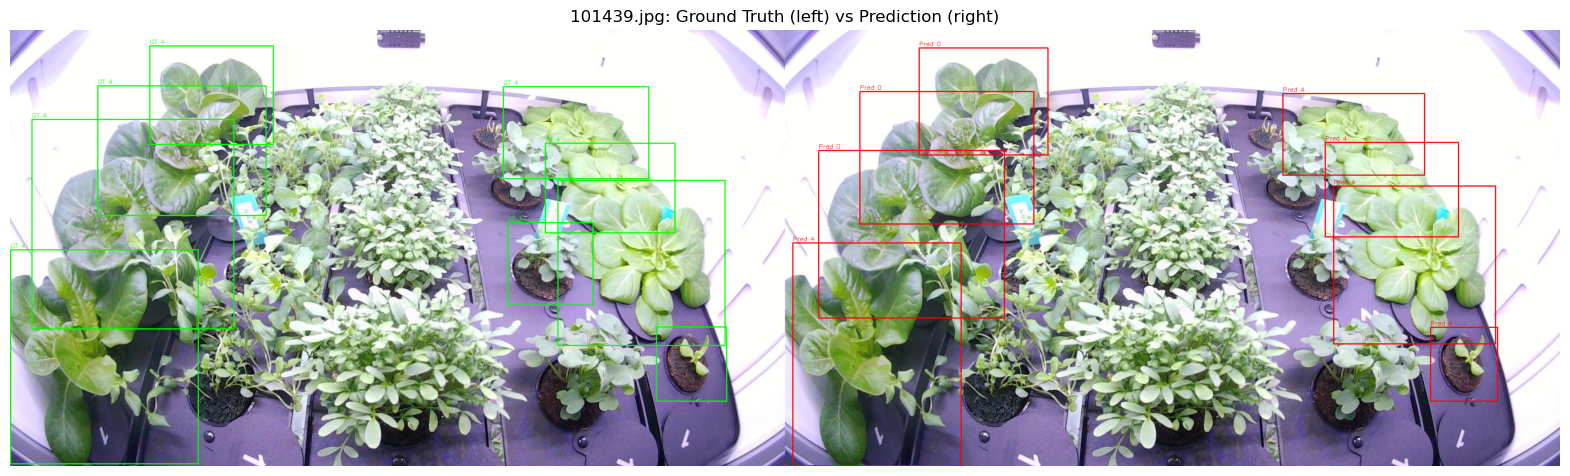

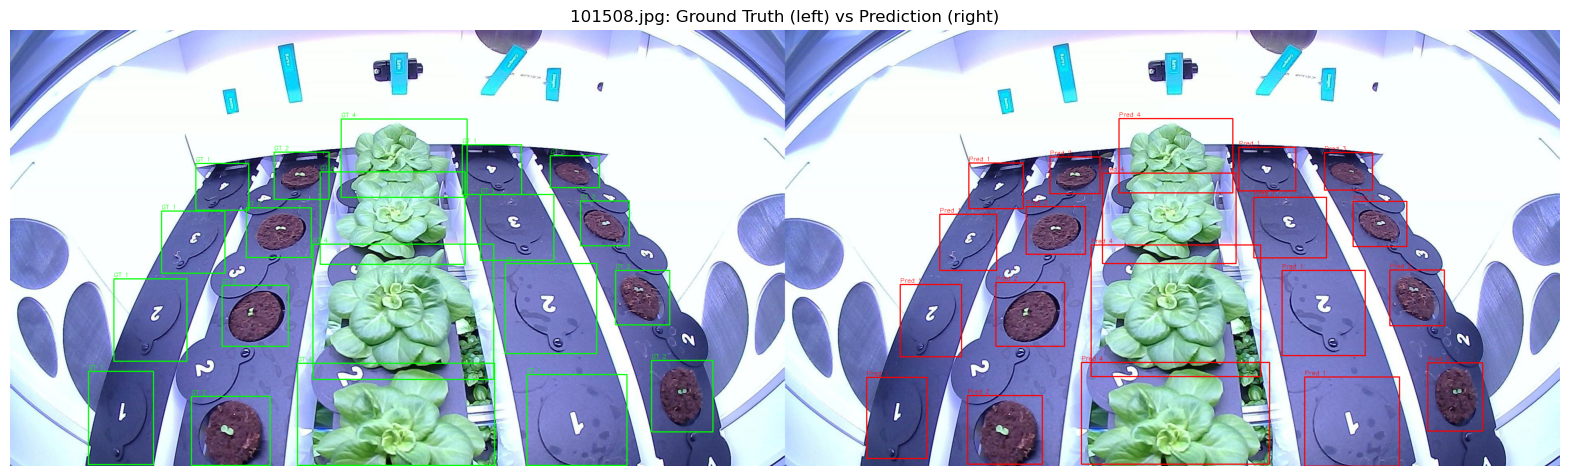

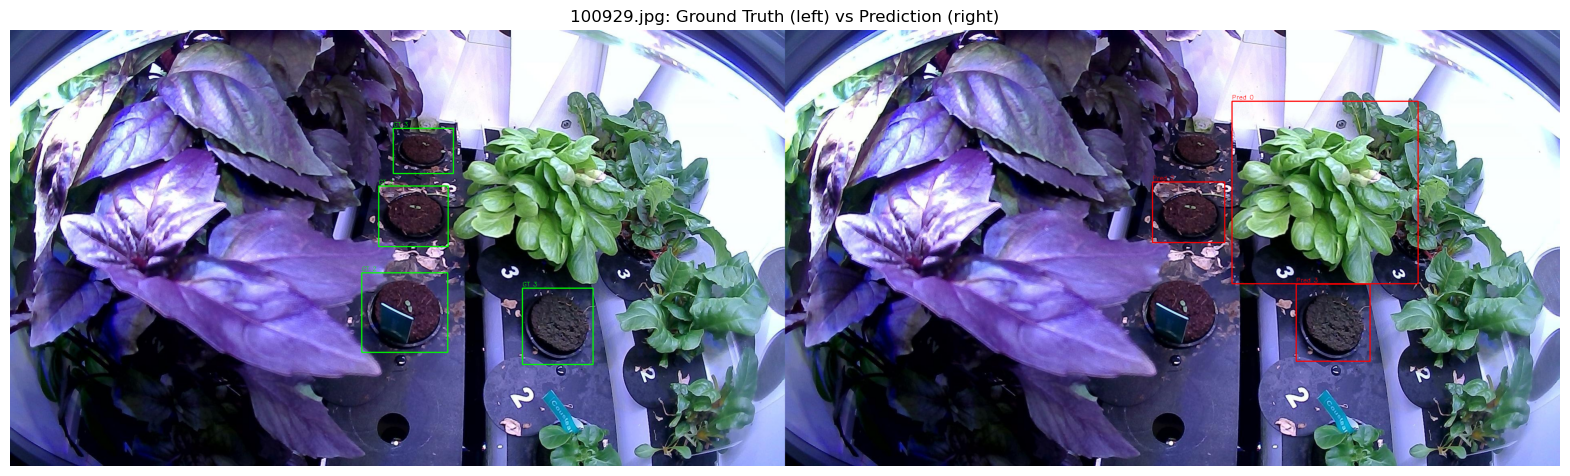

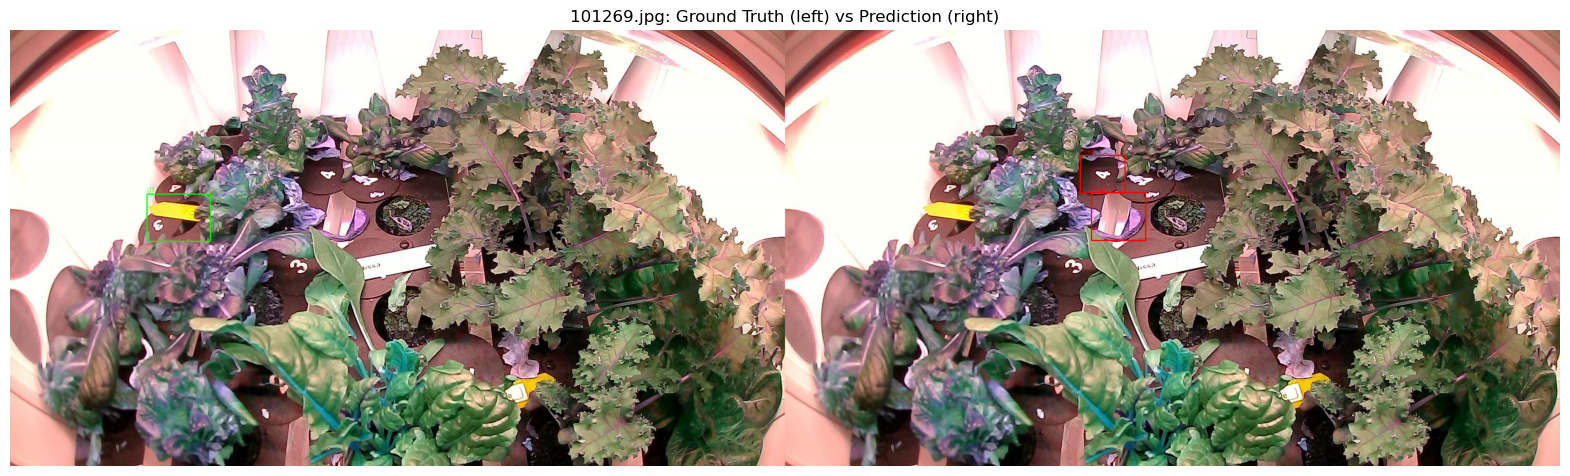

In [17]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
image_dir = 'dataset/Object_Detection/yolo/test/images'
gt_label_dir = 'dataset/Object_Detection/yolo/test/labels'
pred_label_dir = 'yolov5/runs/detect/test_preds/labels'


def read_yolo_labels(label_path):
    boxes = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                cls, x, y, w, h = map(float, parts[:5])
                boxes.append((cls, x, y, w, h))
    return boxes


def draw_boxes(img, boxes, color, label_prefix):
    h, w = img.shape[:2]
    for cls, x, y, bw, bh in boxes:
        x1, y1 = int((x - bw/2) * w), int((y - bh/2) * h)
        x2, y2 = int((x + bw/2) * w), int((y + bh/2) * h)
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(img, f"{label_prefix}{int(cls)}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    return img

# Visualize side-by-side
sample_images = os.listdir(image_dir)[:5]  # Pick 5 images
for img_file in sample_images:
    if not img_file.lower().endswith(('.jpg', '.png')):
        continue

    img_path = os.path.join(image_dir, img_file)
    gt_path = os.path.join(gt_label_dir, img_file.replace('.jpg', '.txt'))
    pred_path = os.path.join(pred_label_dir, img_file.replace('.jpg', '.txt'))

   
    original = cv2.imread(img_path)

    # Draw ground truth (green)
    gt_img = original.copy()
    gt_boxes = read_yolo_labels(gt_path)
    gt_img = draw_boxes(gt_img, gt_boxes, (0, 255, 0), 'GT ')

    # Draw predictions (red)
    pred_img = original.copy()
    pred_boxes = read_yolo_labels(pred_path)
    pred_img = draw_boxes(pred_img, pred_boxes, (0, 0, 255), 'Pred ')

    # Combine side by side
    combined = cv2.hconcat([gt_img, pred_img])
    plt.figure(figsize=(20, 10))
    plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
    plt.title(f"{img_file}: Ground Truth (left) vs Prediction (right)")
    plt.axis('off')
    plt.show()